In [1]:
import pandas as pd
import numpy as np

from pandas import DataFrame,Series

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
import xgboost

In [6]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [7]:
data = pd.read_csv('glassproject.csv')

In [8]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
#RI - Reflective Index

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


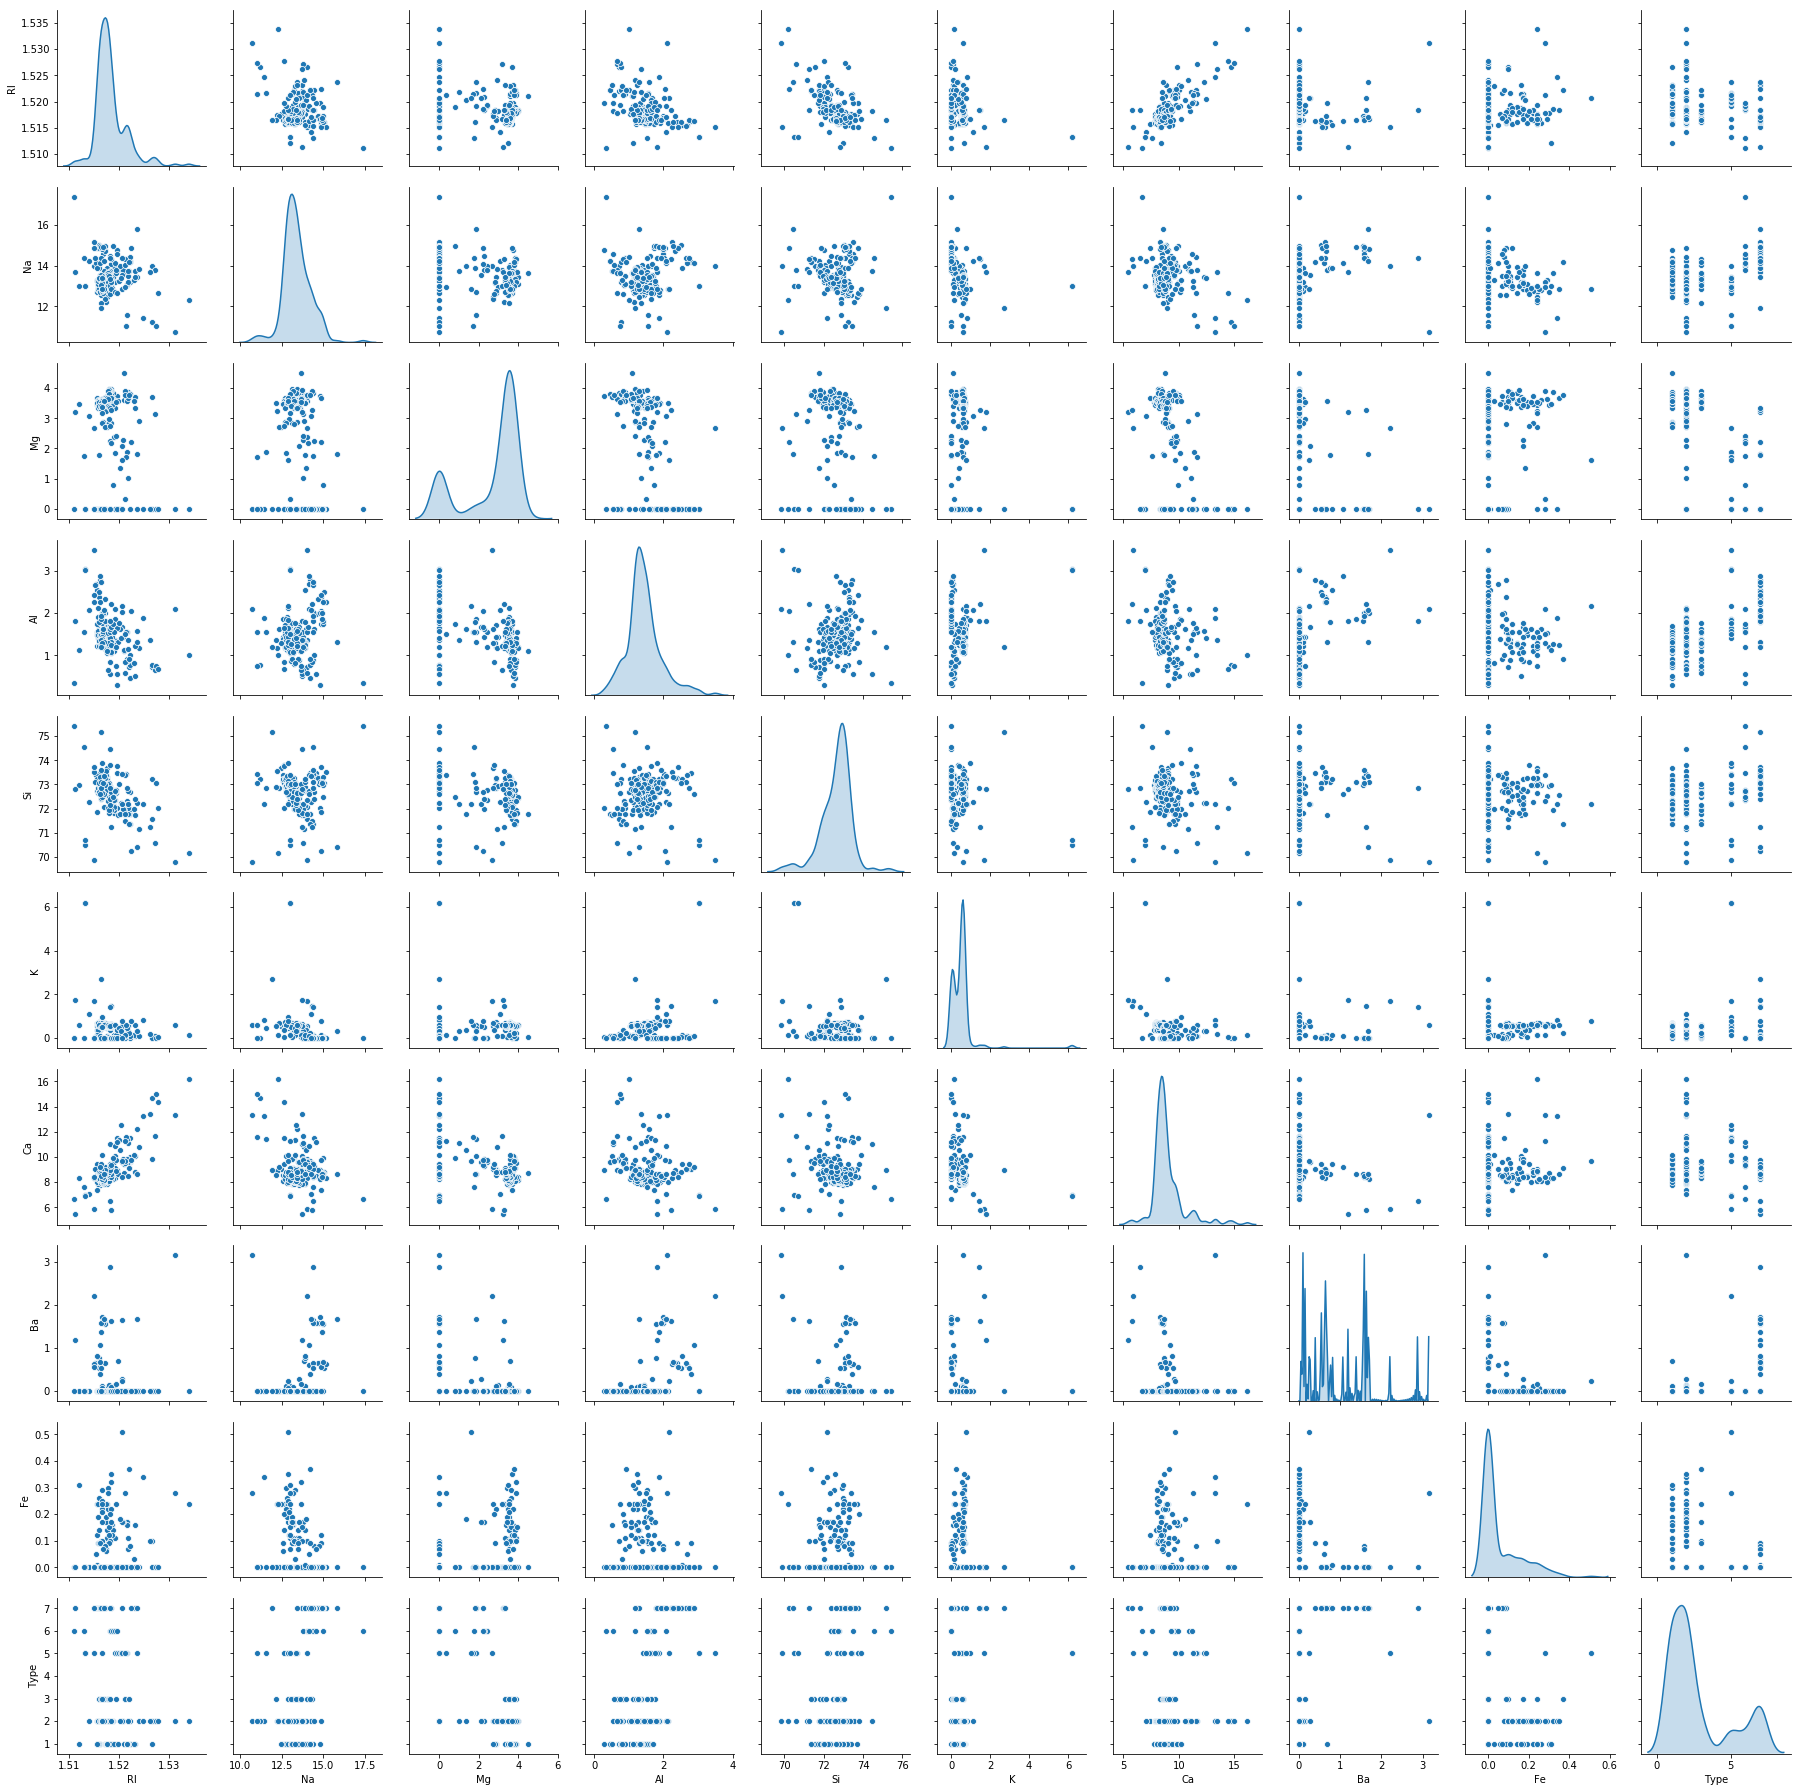

In [11]:
sns.pairplot(data,diag_kind='kde')

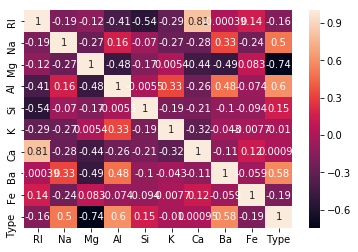

In [12]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [13]:
data.Type = data.Type.astype('category')

In [14]:
data.dtypes

RI       float64
Na       float64
Mg       float64
Al       float64
Si       float64
K        float64
Ca       float64
Ba       float64
Fe       float64
Type    category
dtype: object

In [15]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

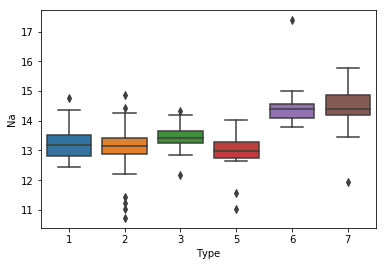

In [16]:
sns.boxplot(x='Type',y='Na',data=data)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df = data.drop(labels='Type',axis=1)
glass = StandardScaler().fit_transform(df)

glass = DataFrame(glass,columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])

In [22]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [23]:
f = df.columns

In [24]:
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

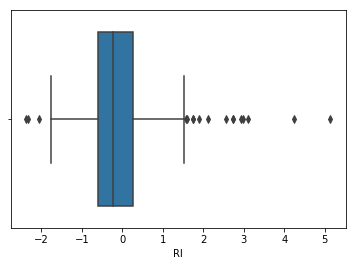

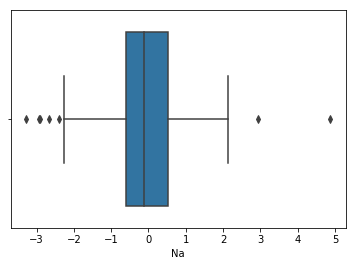

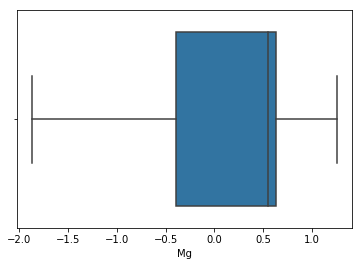

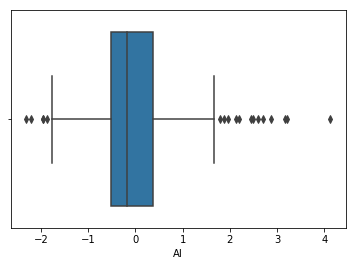

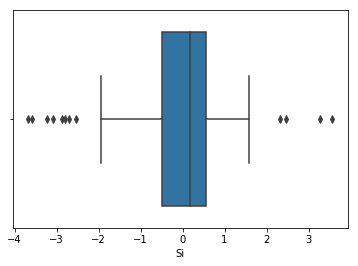

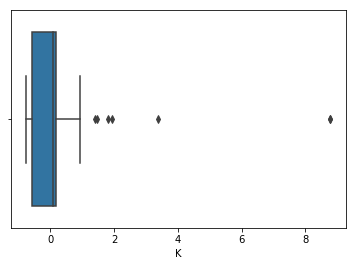

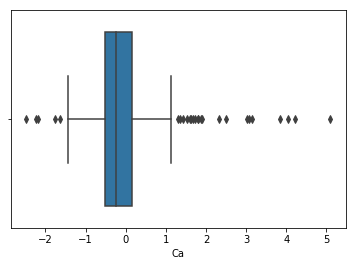

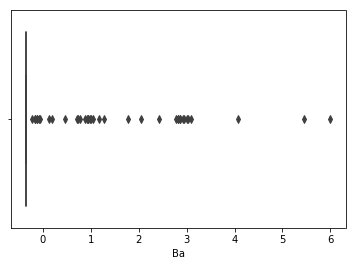

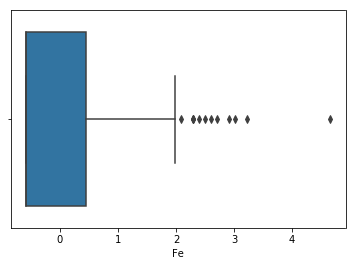

In [25]:
for i in f:
    sns.boxplot(glass[i])
    plt.show()

In [26]:
data.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [27]:
outlier = []
for i in f:
    outlier.append(glass[glass[i]<-3].index.values)
    outlier.append(glass[glass[i]>3].index.values)
j=[]
for i in outlier:
    j.append(list(i))
outliers=[]
for k in j:
    for h in k:
        outliers.append(h)

In [28]:
data.drop(outliers,inplace=True)
data.shape

(194, 10)

In [29]:
glass = data

In [30]:
X=glass.drop(labels='Type',axis=1)
Y=glass.Type

x_sample,x_test,y_sample,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_sample,y_sample,test_size=0.3,random_state=1)

## Logistic Regression

In [31]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_val,y_val)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5365853658536586

In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_val,y_val)

0.7073170731707317

In [33]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_val,y_val)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6829268292682927

In [126]:
#With Over Sampling

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm=SMOTE(k_neighbors=5,random_state=1)

In [36]:
x_os,y_os=sm.fit_sample(X,Y)

In [37]:
X=DataFrame(x_os,columns=X.columns)
Y=DataFrame(y_os,columns=['Type'])

In [38]:
x_sample,x_test,y_sample,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)
x_train,x_val,y_train,y_val = train_test_split(x_sample,y_sample,test_size=0.3,random_state=1)

In [39]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_val,y_val)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6741573033707865

In [40]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_val,y_val)

0.8089887640449438

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_val,y_val)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8539325842696629

In [42]:
print('Logistic Regression:')
print('Train',lr.score(x_train,y_train))
print('Valid',lr.score(x_val,y_val))
print('Test',lr.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')

Logistic Regression:
Train 0.7317073170731707
Valid 0.6741573033707865
Test 0.746031746031746



Decision Tree:
Train 1.0
Valid 0.8089887640449438
Test 0.8412698412698413



Random Forest:
Train 0.9951219512195122
Valid 0.8539325842696629
Test 0.8650793650793651





In [153]:
bc = BaggingClassifier(oob_score=True,random_state=1)
bc.fit(X,Y)
bc.oob_score_

C:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


0.8666666666666667

In [156]:
rf = RandomForestClassifier(oob_score=True,random_state=1)
rf.fit(X,Y)
rf.oob_score_

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


0.8523809523809524

In [164]:
gb = GradientBoostingClassifier(max_depth=5)
gb.fit(x_train,y_train)
gb.score(x_val,y_val)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9101123595505618

In [160]:
gb.score(x_test,y_test)

0.8809523809523809

In [165]:
print('Logistic Regression:')
print('Train',lr.score(x_train,y_train))
print('Valid',lr.score(x_val,y_val))
print('Test',lr.score(x_test,y_test))
print('\n\n')

print('Decision Tree:')
print('Train',dt.score(x_train,y_train))
print('Valid',dt.score(x_val,y_val))
print('Test',dt.score(x_test,y_test))
print('\n\n')

print('Random Forest:')
print('Train',rf.score(x_train,y_train))
print('Valid',rf.score(x_val,y_val))
print('Test',rf.score(x_test,y_test))
print('\n\n')

print('Gradient Descent:')
print('Train',gb.score(x_train,y_train))
print('Valid',gb.score(x_val,y_val))
print('Test',gb.score(x_test,y_test))
print('\n\n')

Logistic Regression:
Train 0.7317073170731707
Valid 0.6741573033707865
Test 0.746031746031746



Decision Tree:
Train 1.0
Valid 0.797752808988764
Test 0.8253968253968254



Random Forest:
Train 1.0
Valid 0.8202247191011236
Test 0.8888888888888888



Gradient Descent:
Train 1.0
Valid 0.9101123595505618
Test 0.9206349206349206



